In [484]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np

In [485]:
# horizntal cell in this matrix... first 2 columns are position. 0,0; 0,1 etc. 
# third position is wheter blocked (0) or open (1).
# fourth position is index of whether / when visited. 0 means not visited yet. a number would indicate nth step.
# total N * M tiles. blocked n * m. N,n - vertical. M,m - horizontal 
# N(i) -> x.   M(j) -> y 
N = 5
M = 4
n = 1
m = 1
input_steps = 5

arr = np.empty((N,M,4)).astype(np.int32)

for j in range(M):
    for i in range(N):
        arr[i,j] = [i,j,1,0]

arr[0:n,0:m,2] = 0
arr[N-n:N,M-m:M,2] = 0
arr[0:n,M-m:M,2] = 0
arr[N-n:N,0:m,2] = 0

In [486]:
step = 1
total_steps = 0
for j in range(M):
    for i in range(N):
        if (total_steps == 0):
            if (arr[i,j,2] == 1) & (arr[i,j,3] == 0):
                arr[i,j,3] = step
                x = i
                y = j
                current_process = 'x+1'
        if (arr[i,j,2] == 1):
            total_steps = total_steps + 1
total_steps = input_steps
print ('a0 ', x,y,step,arr[x,y], current_process)

a0  1 0 1 [1 0 1 1] x+1


In [487]:
for step in range(2, total_steps+1):
    if current_process == 'x+1':
        if (y-1 >= 0) and (arr[x,y-1,2] == 1) and (arr[x,y-1,3] == 0):
                arr[x,y-1,3] = step
                y = y-1
                current_process = 'y-1'
                print ('a1 ', x,y,step,arr[x,y], current_process)
        elif (x+1 < N) and (arr[x+1,y,2] == 1) and (arr[x+1,y,3] == 0):
                arr[x+1,y,3] = step
                x = x+1
                current_process = 'x+1'
                print ('a2 ', x,y,step,arr[x,y], current_process)
        elif (y+1 < M) and (arr[x,y+1,2] == 1) and (arr[x,y+1,3] == 0):
                arr[x,y+1,3] = step
                y = y+1
                current_process = 'y+1'
                print ('a3 ', x,y,step,arr[x,y], current_process)
        
    elif current_process == 'y+1':
        if (x+1 < N) and (arr[x+1,y,2] == 1) and (arr[x+1,y,3] == 0):
                arr[x+1,y,3] = step
                x = x+1
                current_process = 'x+1'
                print ('a4 ', x,y,step,arr[x,y], current_process)
        elif (y+1 < M) and (arr[x,y+1,2] == 1) and (arr[x,y+1,3] == 0):
                arr[x,y+1,3] = step
                y = y+1
                current_process = 'y+1'
                print ('a5 ', x,y,step,arr[x,y], current_process)
        elif (x-1 >= 0) and (arr[x-1,y,2] == 1) and (arr[x-1,y,3] == 0):
                arr[x-1,y,3] = step
                x = x-1
                current_process = 'x-1'
                print ('a6 ', x,y,step,arr[x,y], current_process)
                
    elif current_process == 'x-1':
        if (y+1 < M) and (arr[x,y+1,2] == 1) and (arr[x,y+1,3] == 0):
                arr[x,y+1,3] = step
                y = y+1
                current_process = 'y+1'
                print ('a7 ', x,y,step,arr[x,y], current_process)
        elif (x-1 >= 0) and (arr[x-1,y,2] == 1) and (arr[x-1,y,3] == 0):
                arr[x-1,y,3] = step
                x = x-1
                current_process = 'x-1'
                print ('a8 ', x,y,step,arr[x,y], current_process)
        elif (y-1 >= 0) and (arr[x,y-1,2] == 1) and (arr[x,y-1,3] == 0):
                arr[x,y-1,3] = step
                y = y-1
                current_process = 'y-1'
                print ('a9 ', x,y,step,arr[x,y], current_process)
                
    elif current_process == 'y-1':
        if (x-1 >= 0) and (arr[x-1,y,2] == 1) and (arr[x-1,y,3] == 0):
                arr[x-1,y,3] = step
                x = x-1
                current_process = 'x-1'
                print ('aa ', x,y,step,arr[x,y], current_process)
        elif (y-1 >= 0) and (arr[x,y-1,2] == 1) and (arr[x,y-1,3] == 0):
                arr[x,y-1,3] = step
                y = y-1
                current_process = 'y-1'
                print ('ab ', x,y,step,arr[x,y], current_process)
        elif (x+1 < N) and (arr[x+1,y,2] == 1) and (arr[x+1,y,3] == 0):
                arr[x+1,y,3] = step
                x = x+1
                current_process = 'x+1'
                print ('ac ', x,y,step,arr[x,y], current_process)
                
    else:
        break;
            


a2  2 0 2 [2 0 1 2] x+1
a2  3 0 3 [3 0 1 3] x+1
a3  3 1 4 [3 1 1 4] y+1
a4  4 1 5 [4 1 1 5] x+1


In [488]:
arr

array([[[0, 0, 0, 0],
        [0, 1, 1, 0],
        [0, 2, 1, 0],
        [0, 3, 0, 0]],

       [[1, 0, 1, 1],
        [1, 1, 1, 0],
        [1, 2, 1, 0],
        [1, 3, 1, 0]],

       [[2, 0, 1, 2],
        [2, 1, 1, 0],
        [2, 2, 1, 0],
        [2, 3, 1, 0]],

       [[3, 0, 1, 3],
        [3, 1, 1, 4],
        [3, 2, 1, 0],
        [3, 3, 1, 0]],

       [[4, 0, 0, 0],
        [4, 1, 1, 5],
        [4, 2, 1, 0],
        [4, 3, 0, 0]]])

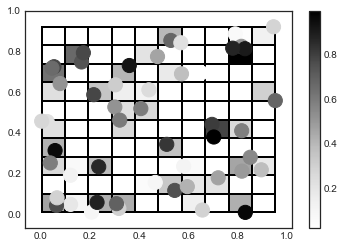

In [482]:
import numpy as np
import matplotlib.pyplot as plt

x, y, z = np.random.random((3, 50))

zi, yi, xi = np.histogram2d(y, x, bins=(10,10), weights=z, normed=False)
zi = np.ma.masked_equal(zi, 0)

fig, ax = plt.subplots()
ax.pcolormesh(xi, yi, zi, edgecolors='black')
scat = ax.scatter(x, y, c=z, s=200)
fig.colorbar(scat)
ax.margins(0.05)

plt.show()

In [483]:
for j in range(M):
    for i in range(N):
        if (arr[i,j,2] == 1):
            if (arr[i,j,3] != 0):
                print (arr[i,j], 'was open -- now USED --')
            else:
                print (arr[i,j], 'open')
        else:
            print (arr[i,j], 'blocked')


[0 0 0 0] blocked
[1 0 1 1] was open -- now USED --
[2 0 1 2] was open -- now USED --
[3 0 1 3] was open -- now USED --
[4 0 0 0] blocked
[0 1 1 0] open
[1 1 1 0] open
[2 1 1 0] open
[3 1 1 4] was open -- now USED --
[4 1 1 5] was open -- now USED --
[0 2 1 0] open
[1 2 1 0] open
[2 2 1 0] open
[3 2 1 0] open
[4 2 1 0] open
[0 3 0 0] blocked
[1 3 1 0] open
[2 3 1 0] open
[3 3 1 0] open
[4 3 0 0] blocked
